In [1]:
include(string(realpath(pwd()*"/../temp")*"/ActStatData.jl"))
include(string(realpath(pwd()*"/../temp")*"/ActPlotData.jl"))
using PyCall
pygui(:tk)
using PyPlot, DataFrames, Dates
using .ActPlotData
using .ActStatData
using CSV, DelimitedFiles, StatsBase, LinearAlgebra

┌ Info: Recompiling stale cache file /home/faragegr/.julia/compiled/v0.7/DataFrames/AR9oZ.ji for DataFrames [a93c6f00-e57d-5684-b7b6-d8193f3e46c0]
└ @ Base loading.jl:1185
┌ Info: Recompiling stale cache file /home/faragegr/.julia/compiled/v0.7/CSV/HHBkp.ji for CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1185


In [2]:
pwd()

"/home/faragegr/Projects/smartbandactivity2018/develop/test"

In [4]:
# List of visit directories
listDir = ["/home/faragegr/Projects/smartbandactivity2018/data/Baseline Visit Data/";
           "/home/faragegr/Projects/smartbandactivity2018/data/32 Week Gestation Data/";
           "/home/faragegr/Projects/smartbandactivity2018/data/6 Week PP Data/";
           "/home/faragegr/Projects/smartbandactivity2018/data/6 Months PP Data/"]

myDir = listDir[1];
# Get the data list files from the directory myDir
(myData, myHeader) = ActStatData.filesNoNaN(myDir);

In [5]:
numFile = 3;
# Get the weight from the bio file
dfB = ActStatData.readActivity(myDir*myHeader[numFile])
wght = parse(Float64, dfB[6,2]);
# Get any file and show columns of the data frame structure
df = ActStatData.readActivity(myDir*myData[numFile]);
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Int64,DataType
1,Day,6.46647,1.0,6.0,12.0,,0,Float64
2,ElapsedSeconds,472530.0,180.0,472530.0,944880.0,,0,Float64
3,DateTime,,2017-05-22T11:59:00,,2017-06-02T10:24:00,15746,0,DateTime
4,ActivityCounts,87.9847,0.0,0.0,3346.0,,0,Float64
5,Steps,3.83545,0,0.0,125,,0,Int64
6,EnergyExpenditure,0.00336739,0.0,0.0,0.063,,0,Float64
7,ActivityIntensity,1.25861,1.0,1.0,3.0,,0,Float64


In [7]:
completeNumDays = 7;
# Select the first 7 days
df = df[df[:Day] .< completeNumDays+1, :];
describe(df)

,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Int64,DataType
1,Day,4.23042,1.0,4.0,7.0,,0,Float64
2,ElapsedSeconds,280980.0,180.0,280980.0,561780.0,,0,Float64
3,DateTime,,2017-05-22T11:59:00,,2017-05-28T23:59:00,9361,0,DateTime
4,ActivityCounts,127.153,0.0,4.0,3346.0,,0,Float64
5,Steps,5.46875,0,0.0,93,,0,Int64
6,EnergyExpenditure,0.00496582,0.0,0.0,0.063,,0,Float64
7,ActivityIntensity,1.38671,1.0,1.0,3.0,,0,Float64


In [8]:
# Estimate the total amount of calories burnt per day
dfSumAct = by(df, :Day) do d
    DataFrame(ActCalPerDiem = sum(d[:EnergyExpenditure]).*wght)
end

,Day,ActCalPerDiem
,Float64⍰,Float64
1,1.0,226.786
2,2.0,582.718
3,3.0,665.827
4,4.0,675.062
5,5.0,378.407
6,6.0,346.018
7,7.0,281.513


In [9]:
sumAEE = dfSumAct[:ActCalPerDiem]
sumAEE = collect(Iterators.flatten(transpose(sumAEE)));

In [11]:
dtmp = df[df[:Day] .== 1, :];
tmp =  Int64.(collect(Iterators.flatten(dtmp[:ActivityIntensity])));
tmp = sort(tmp);

In [21]:
counts(tmp);
weekIntensity = zeros(completeNumDays, 4, 2)
weekIntensity[1,1:3,1:2] = [counts(tmp) counts(tmp).*100/sum(counts(tmp))]

3×2 Array{Float64,2}:
 491.0  68.0999 
 199.0  27.6006 
  31.0   4.29958

In [22]:
weekIntensity

7×4×2 Array{Float64,3}:
[:, :, 1] =
 491.0  199.0  31.0  0.0
   0.0    0.0   0.0  0.0
   0.0    0.0   0.0  0.0
   0.0    0.0   0.0  0.0
   0.0    0.0   0.0  0.0
   0.0    0.0   0.0  0.0
   0.0    0.0   0.0  0.0

[:, :, 2] =
 68.0999  27.6006  4.29958  0.0
  0.0      0.0     0.0      0.0
  0.0      0.0     0.0      0.0
  0.0      0.0     0.0      0.0
  0.0      0.0     0.0      0.0
  0.0      0.0     0.0      0.0
  0.0      0.0     0.0      0.0

In [23]:
 weekIntensity = zeros(completeNumDays, 4, 2)
    for i = 1:completeNumDays
        dtmp = df[df[:Day] .== i, :];
        tmp =  Int64.(collect(Iterators.flatten(dtmp[:ActivityIntensity])));
        tmp = sort(tmp);
        if length(counts(tmp)) < 4
            if length(counts(tmp)) < 3
                if length(counts(tmp)) < 2 
                    weekIntensity[i,1,:] = [counts(tmp) counts(tmp).*100/sum(counts(tmp))];
                else
                    weekIntensity[i,1:2,1:2] = [counts(tmp) counts(tmp).*100/sum(counts(tmp))];
                end
            else 
                weekIntensity[i,1:3,1:2] = [counts(tmp) counts(tmp).*100/sum(counts(tmp))];  
            end
        else
            weekIntensity[i,:,:] = [counts(tmp) counts(tmp).*100/sum(counts(tmp))];
        end    
    end

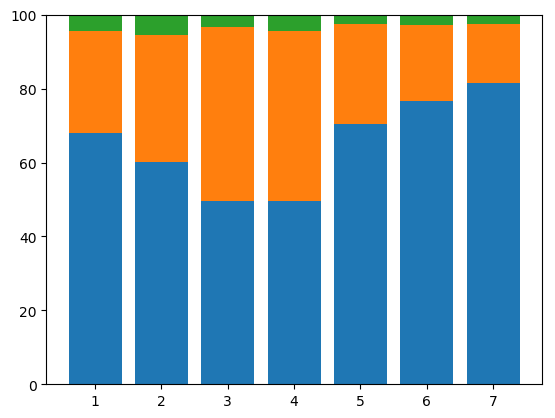

(PyObject <matplotlib.patches.Rectangle object at 0x7f5625e25048>, PyObject <matplotlib.patches.Rectangle object at 0x7f5625e75390>, PyObject <matplotlib.patches.Rectangle object at 0x7f5625e257f0>, PyObject <matplotlib.patches.Rectangle object at 0x7f5625e25b70>, PyObject <matplotlib.patches.Rectangle object at 0x7f5625e25ef0>, PyObject <matplotlib.patches.Rectangle object at 0x7f5625e25f28>, PyObject <matplotlib.patches.Rectangle object at 0x7f5625e31630>)

In [29]:
 myWidth = 0.8;
numD = completeNumDays;
x = collect(1:numD)
bar(x, weekIntensity[1:numD,1,2] ,  width = myWidth)
bar(x, weekIntensity[1:numD,2,2], width = myWidth, bottom = weekIntensity[1:numD,1,2])
bar(x, weekIntensity[1:numD,3,2], width = myWidth, bottom = weekIntensity[1:numD,2,2]+weekIntensity[1:numD,1,2])
bar(x, weekIntensity[1:numD,4,2], width = myWidth, bottom = weekIntensity[1:numD,3,2]+weekIntensity[1:numD,2,2]+weekIntensity[1:numD,1,2])

In [24]:
size(weekIntensity)

(7, 4, 2)

In [25]:
weekIntensity

7×4×2 Array{Float64,3}:
[:, :, 1] =
  491.0  199.0  31.0  0.0
  865.0  494.0  81.0  0.0
  713.0  678.0  49.0  0.0
  715.0  663.0  62.0  0.0
 1016.0  388.0  36.0  0.0
 1105.0  294.0  41.0  0.0
 1173.0  230.0  37.0  0.0

[:, :, 2] =
 68.0999  27.6006  4.29958  0.0
 60.0694  34.3056  5.625    0.0
 49.5139  47.0833  3.40278  0.0
 49.6528  46.0417  4.30556  0.0
 70.5556  26.9444  2.5      0.0
 76.7361  20.4167  2.84722  0.0
 81.4583  15.9722  2.56944  0.0

In [44]:
b = zeros(rot180(size(aa)))

MethodError: MethodError: no method matching rot180(::Tuple{Int64,Int64})
Closest candidates are:
  rot180(!Matched::SparseArrays.SparseMatrixCSC) at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v0.7/SparseArrays/src/sparsematrix.jl:3437
  rot180(!Matched::AbstractArray{T,2} where T) at arraymath.jl:196
  rot180(!Matched::AbstractArray{T,2} where T, !Matched::Integer) at arraymath.jl:303

In [53]:
size(aa)[2]

3

In [26]:
# Generate a matrix (7x3) containing ratio activity level for rounding
aa = weekIntensity[:,:,2]
cc = convert(Array{Float64,2},LinearAlgebra.transpose!(bb,weekIntensity[:,:,2]))



UndefVarError: UndefVarError: bb not defined

In [59]:
# Get timing of the first and last epoch in order to estimate the
# total number of days.
myStartTime = df[1,3];
myFinishTime = df[end,3];
# Get the total number of seconds wearing the device
totalWearTime = convert(Float64,Dates.value(Dates.Second((myFinishTime-myStartTime)))); #in seconds
completeNumDays = Int(floor(totalWearTime/86400)); # number of day with full 24 hours
[myStartTime,myFinishTime]

2-element Array{DateTime,1}:
 2017-05-22T11:59:00
 2017-05-28T23:59:00

In [44]:
[Dates.dayname(myStartTime),Dates.dayname(myFinishTime)]

2-element Array{String,1}:
 "Monday"
 "Sunday"

In [45]:
durationDay = collect(Iterators.flatten(Dates.format.([myStartTime:Day(1):myFinishTime], "e, dd u yyyy")))

┌ Warning: `format(Y::AbstractArray{<:TimeType}, f::AbstractString; locale::Locale=ENGLISH)` is deprecated, use `format.(Y, f; locale=locale)` instead.
│   caller = _broadcast_getindex_evalf at broadcast.jl:574 [inlined]
└ @ Core ./broadcast.jl:574


7-element Array{String,1}:
 "Mon, 22 May 2017"
 "Tue, 23 May 2017"
 "Wed, 24 May 2017"
 "Thu, 25 May 2017"
 "Fri, 26 May 2017"
 "Sat, 27 May 2017"
 "Sun, 28 May 2017"

In [8]:
durationDay = ["Day 1","Day 2", "Day 3", "Day 4", "Day 5", "Day 6", "Day 7"];

In [46]:
########
# PLOT #
########
PyPlot.svg(true)
ioff() # Interactive plotting OFF, necessary for inline plotting in IJulia

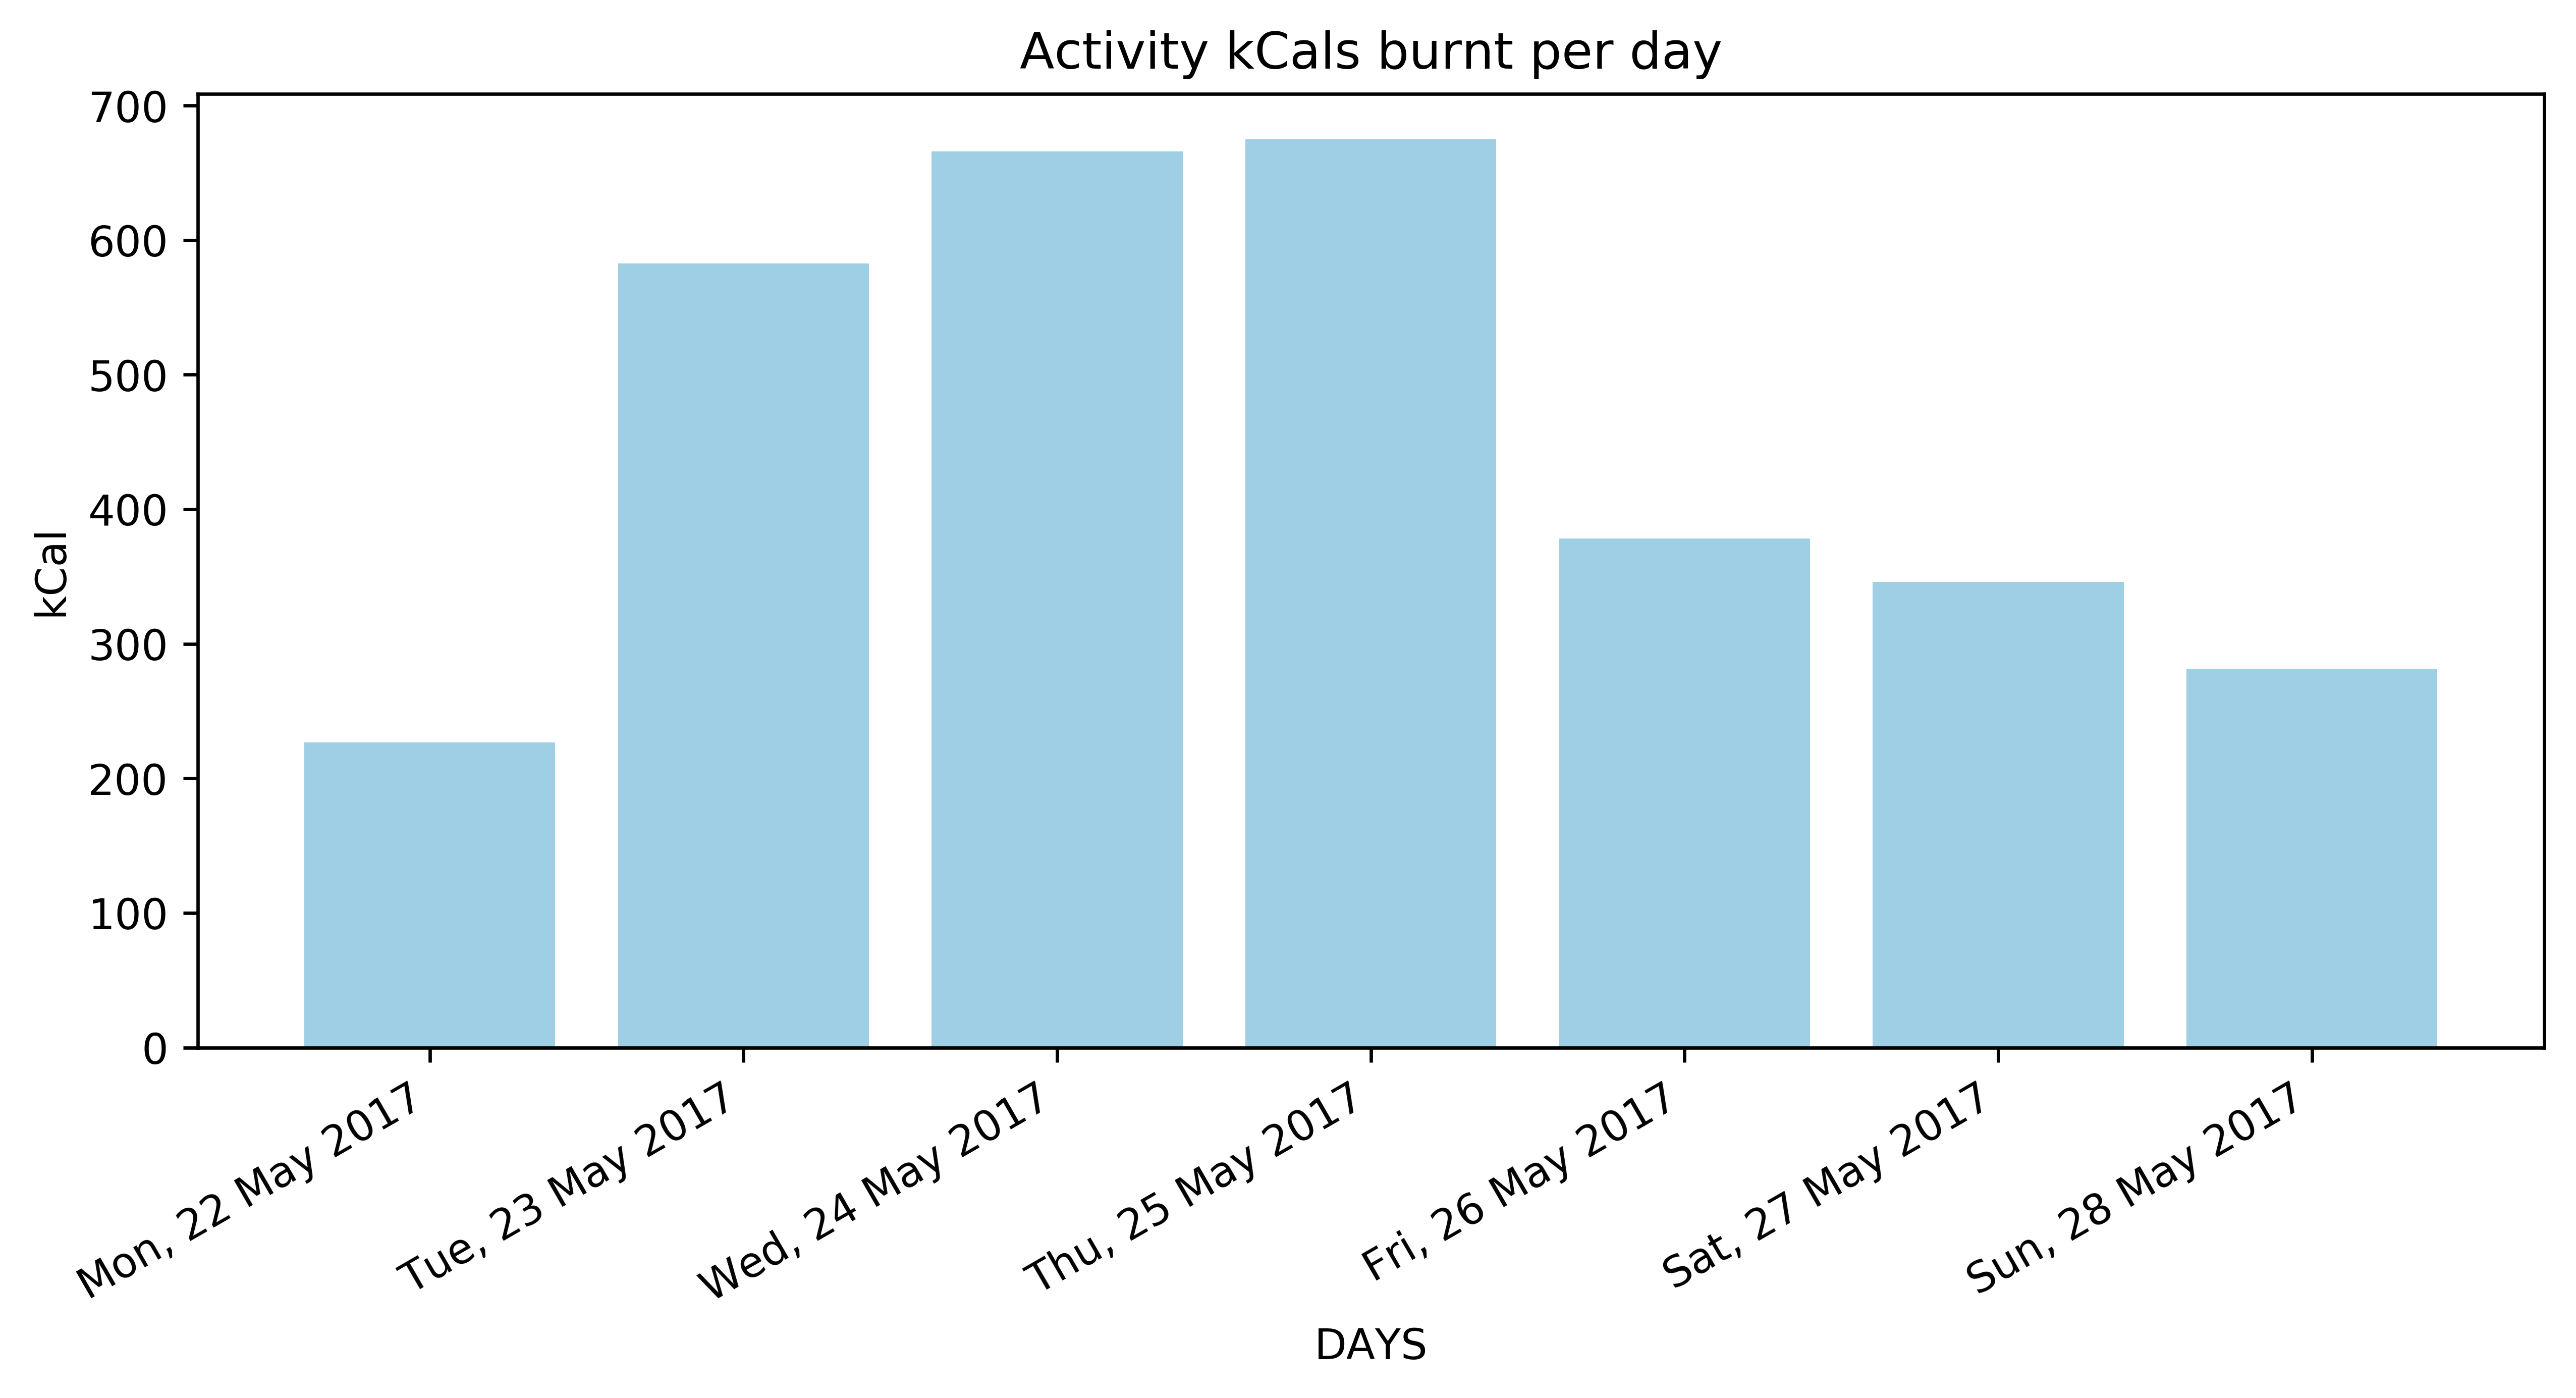

In [48]:
fig = figure("pyplot_barplot",figsize=(10,5), dpi= 600)
b = bar(durationDay,sumAEE,color="#0f87bf",align="center",alpha=0.4);
axis("tight")
title("Activity kCals burnt per day")
grid("off")
xlabel("DAYS")
ylabel("kCal")
fig[:autofmt_xdate](bottom=0.25,rotation=30,ha="right")
savefig("/home/faragegr/Project/smartbandactivity2018/develop/test/temp_images/fig1.png", dpi= 600)
#gcf() # Needed for IJulia to plot inline

In [42]:
fig2 = figure("pyplot_barplot",figsize=(10,5), dpi=300)
myWidth = 0.8;
numD = completeNumDays;
bar(durationDay, weekIntensity[1:numD,1,2] ,width = myWidth, label = "Light", align="center")
bar(x, weekIntensity[1:numD,2,2], width = myWidth, bottom = weekIntensity[1:numD,1,2], label = "Moderate", align="center",
    color = "orange")
legend()
xlabel("DAYS")
ylabel("% intensity level")
fig2[:autofmt_xdate](bottom=0.25,rotation=30,ha="right")

UndefVarError: UndefVarError: x not defined

In [36]:
fig2 = figure("pyplot_barplot",figsize=(10,5), dpi=300)
myWidth = 0.8;
numD = completeNumDays;
bar(durationDay, weekIntensity[1:numD,1,2] ,width = myWidth, label = "Light", align="center")
bar(durationDay, weekIntensity[1:numD,2,2], width = myWidth, bottom = weekIntensity[1:numD,1,2], label = "Moderate", align="center",
    color = "orange")
bar(durationDay, weekIntensity[1:numD,3,2], width = myWidth, bottom = weekIntensity[1:numD,2,2]+weekIntensity[1:numD,1,2], 
    label = "Vigorous", align="center",color = "red")

axis("tight")
title("Activity Intensity ratio per day")
grid(false)
legend()
xlabel("DAYS")
ylabel("% intensity level")
fig2[:autofmt_xdate](bottom=0.25,rotation=30,ha="right")
savefig("/home/faragegr/Project/smartbandactivity2018/develop/test/tmp_images/fig2.svg", dpi= 300)

UndefVarError: UndefVarError: weekIntensity not defined

In [77]:
savefig("/home/faragegr/Project/smartbandactivity2018/develop/test/test.pdf")

In [76]:
pwd()

"/home/faragegr/Project/smartbandactivity2018/develop/test"

In [46]:
tmp = sort(Int64.(collect(Iterators.flatten(df[:7]))));
actInt = [unique(tmp) counts(tmp) counts(tmp).*100/sum(counts(tmp))]

3×3 Array{Float64,2}:
 1.0  6078.0  64.929  
 2.0  2946.0  31.471  
 3.0   337.0   3.60004

In [ ]:
sum([unique(tmp) counts(tmp) counts(tmp).*100/sum(counts(tmp))],1)

In [149]:
#################
#  Create Data  #
#################
labels = ["Light";"Moderate";"Vigorous"]
colors = ["lightskyblue";"yellowgreen";"red"]
sizes = NaN*zeros(3)
explode = zeros(length(sizes))
explode[3] = 0 # Move slice 2 out by 0.1
sizes = [actInt[1,3]; actInt[2,3]; actInt[3,3]]
font = Dict("fontname"=>"Sans","weight"=>"semibold");

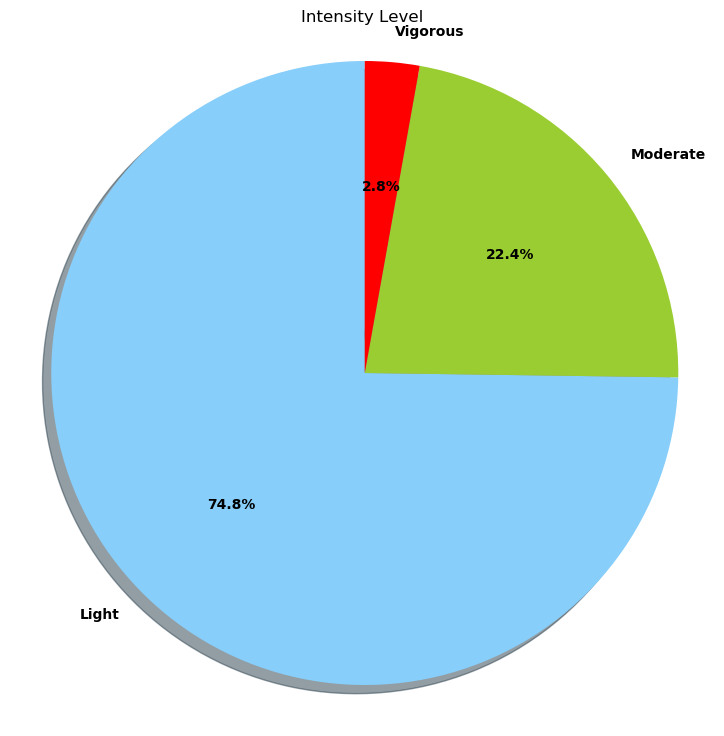

PyObject Text(0.5,1,u'Intensity Level')

In [153]:
###############
#  Pie Chart  #
###############
fig = figure("pyplot_piechart",figsize=(9,9))
p = pie(sizes,
        labels=labels,
        shadow=true,
        startangle=90,
        explode=explode,
        colors=colors,
        autopct="%1.1f%%",
        textprops=font)

axis("equal")
title("Intensity Level")
#gcf() # Needed for IJulia to plot inline

In [23]:
tt = [81.502,  16.034,  2.582]

3-element Array{Float64,1}:
 81.502
 16.034
  2.582

In [24]:
sum(round.(tt, digits = 1))

100.1

In [25]:
up = 10^1

10

In [26]:
ta = tt.*up 

3-element Array{Float64,1}:
 815.02            
 160.33999999999997
  25.82            

In [27]:
y = floor.(ta)

3-element Array{Float64,1}:
 815.0
 160.0
  25.0

In [28]:
sort((ta.-y))

3-element Array{Float64,1}:
 0.01999999999998181
 0.339999999999975  
 0.8200000000000003 

In [29]:
round.(sum(ta)-sum(y))

1.0

In [33]:
y[2] = y[2]+1

161.0

In [34]:
y/up

3-element Array{Float64,1}:
 81.5
 16.1
  2.5